# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.rf_model_trainer import RfModelTrainer
from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.2, 1, 0.8)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 60
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.95,
)

rf_model_trainer = RfModelTrainer(
    rf_drag_config=(100, 42),
    rf_max_temp_config=(100, 42),
    rf_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.95,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config1_2/config2",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=20,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            rf_model_trainer,
            rf_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 10000 and x[1] >= 10000,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=200,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            circle_params,
        ],
    ),
)

[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/gene_parameters.json
[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
------------

/Users/june/Documents/project/cau/4_1/capstone_1_update/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/june/Documents/project/cau/4_1/capstone_1_update/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/june/Documents/project/cau/4_1/capstone_1_update/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and c

-------------------------------
| Training set found, loading |
-------------------------------
-------------------------------
| Training set found, loading |
-------------------------------
------------------------------------
| PCA optimal founding initialized |
------------------------------------
-----------------------------------------------------------------
| Optimal feature count founded: 132 for desired variance: 0.95 |
-----------------------------------------------------------------
[Storage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_1_update/store/gene_parameters.json
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticStorage]: /Users/june/Documents/project/cau/4_1/capstone_1_update/store/exp/tournament/config1_2/config2/fitness_evolution.json n

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config1_2/config2
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 20
Immediate_exit: False
Generation: 0
Initial_population: 200
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_1_update/store/exp/tournament/config1_2/config2/fitness_evolution.json
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_1_update/store/exp/tournament/

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

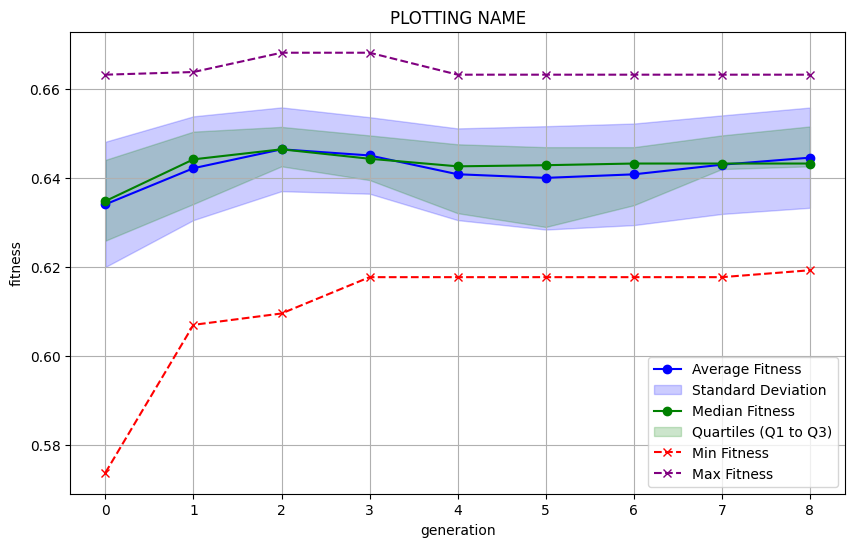

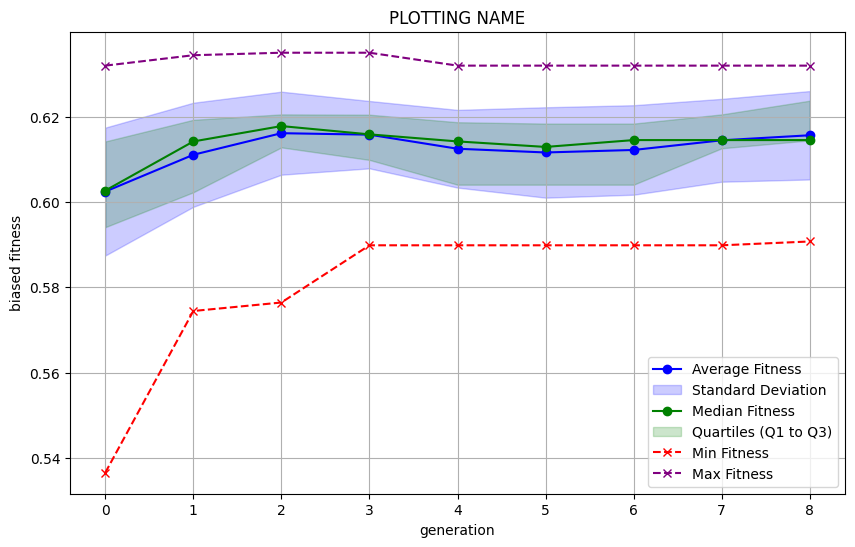

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_79: ['CircleShape_79', 'CornerTransformation_79']
predict: (0.29364046456430565, 373.3363202000002, 457.2002935999998)
biased_fitness: 0.6308316498283318, fitness: 0.6609122853569434
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 7.70220506083455, dx: 2.258485669548661, phi: 0.31314565524772797, rot_count: 3.0, ]


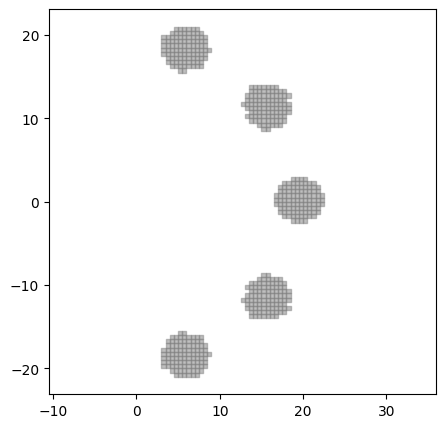

--------------------------------------------------
label: VentHole Chromosome_79: ['CircleShape_61', 'CornerTransformation_150']
predict: (0.29356990644573316, 373.9810311999999, 459.6873221000001)
biased_fitness: 0.6185066782512021, fitness: 0.6459591690426684
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


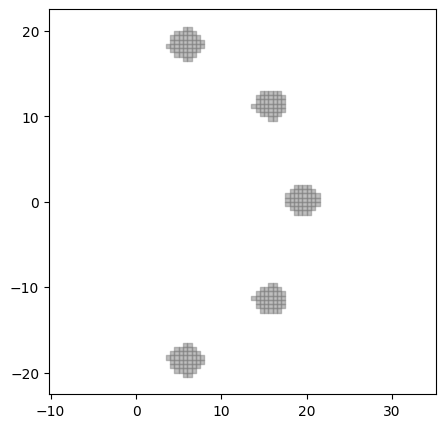

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_79', 'CornerTransformation_150']
predict: (0.2936503263657332, 372.89829930000013, 459.50009129999967)
biased_fitness: 0.6237042219112023, fitness: 0.651504783342669
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.975768881661821, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


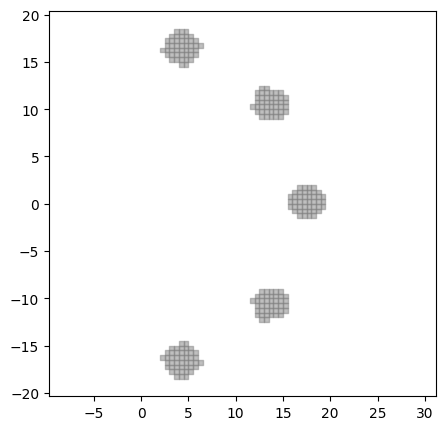

--------------------------------------------------
label: VentHole Chromosome_8: ['CircleShape_150', 'CornerTransformation_79']
predict: (0.2940455645656658, 373.6918342, 459.70732229999993)
biased_fitness: 0.6141647650120108, fitness: 0.6425485718433425
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 7.70220506083455, dx: 2.258485669548661, phi: 0.31314565524772797, rot_count: 3.0, ]


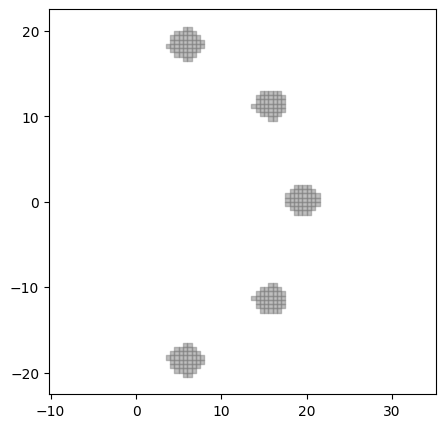

--------------------------------------------------
label: VentHole Chromosome_134: ['CircleShape_79', 'CornerTransformation_150']
predict: (0.29410932308883675, 373.6256024, 459.52046399999995)
biased_fitness: 0.6144782549339591, fitness: 0.6431764371116326
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.975768881661821, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


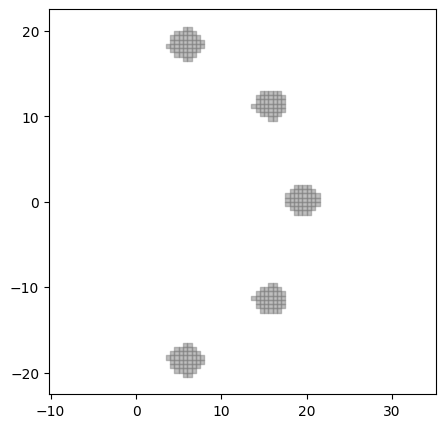

--------------------------------------------------
label: VentHole Chromosome_183: ['CircleShape_150', 'CornerTransformation_134']
predict: (0.29410932308883675, 373.6256024, 459.52046399999995)
biased_fitness: 0.6144782549339591, fitness: 0.6431764371116326
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.975768881661821, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


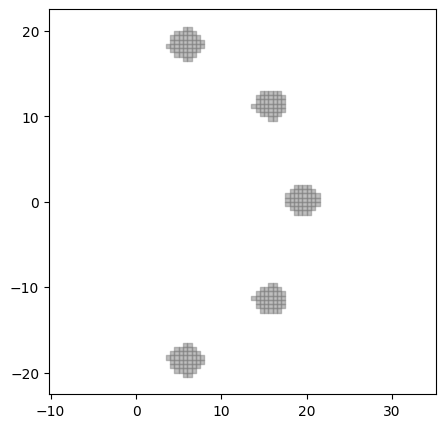

--------------------------------------------------
label: VentHole Chromosome_61: ['CircleShape_16', 'CornerTransformation_183']
predict: (0.29517134684846935, 373.9496523999998, 461.86556099999996)
biased_fitness: 0.5907333318183687, fitness: 0.6192104645153075
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.975768881661821, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


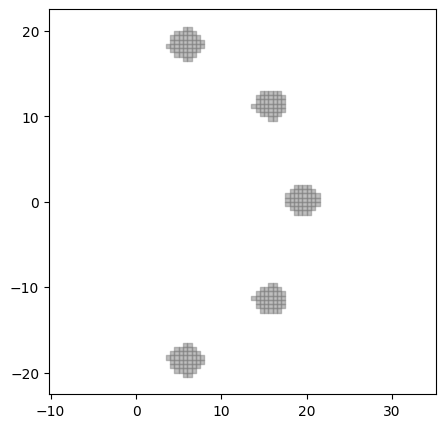

--------------------------------------------------
label: VentHole Chromosome_16: ['CircleShape_134', 'CornerTransformation_8']
predict: (0.29410932308883675, 373.6256024, 459.52046399999995)
biased_fitness: 0.6144782549339591, fitness: 0.6431764371116326
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 7.70220506083455, dx: 2.258485669548661, phi: 0.31314565524772797, rot_count: 3.0, ]


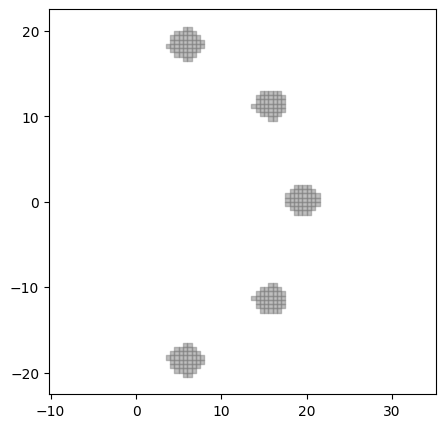

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_183', 'CornerTransformation_150']
predict: (0.29410932308883675, 373.6256024, 459.52046399999995)
biased_fitness: 0.6144782549339591, fitness: 0.6431764371116326
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


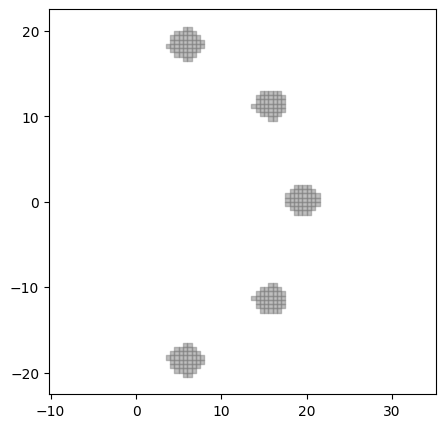

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_8', 'CornerTransformation_8']
predict: (0.29362457391146474, 373.3344144000002, 458.32553859999973)
biased_fitness: 0.6265308866624231, fitness: 0.6554544958853529
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


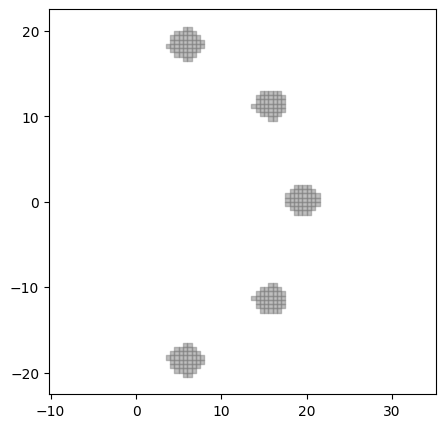

--------------------------------------------------
label: VentHole Chromosome_183: ['CircleShape_183', 'CornerTransformation_150']
predict: (0.2943523356468398, 373.5799285999999, 459.3284277)
biased_fitness: 0.6125586184379224, fitness: 0.641934862031602
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


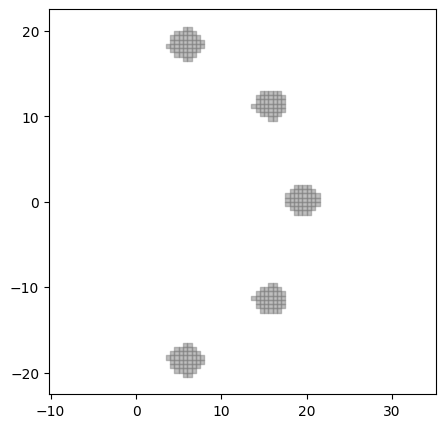

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_61', 'CornerTransformation_183']
predict: (0.29410932308883675, 373.6256024, 459.52046399999995)
biased_fitness: 0.6144782549339591, fitness: 0.6431764371116326
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 7.70220506083455, dx: 2.258485669548661, phi: 0.31314565524772797, rot_count: 3.0, ]


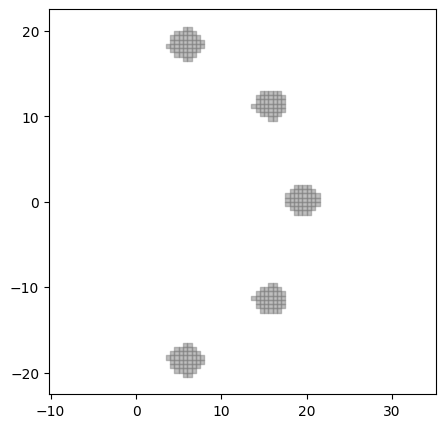

--------------------------------------------------
label: VentHole Chromosome_180: ['CircleShape_150', 'CornerTransformation_150']
predict: (0.2948563534377369, 374.1207226, 459.40384890000007)
biased_fitness: 0.6035047501471564, fitness: 0.6338136081226302
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


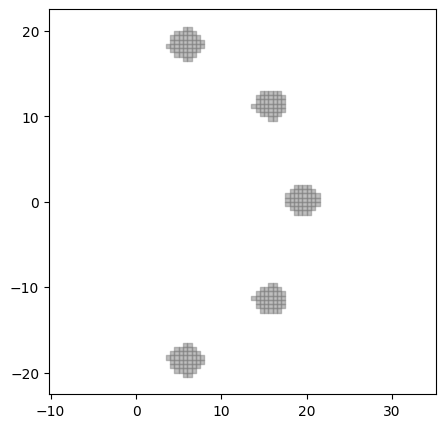

--------------------------------------------------
label: VentHole Chromosome_8: ['CircleShape_180', 'CornerTransformation_183']
predict: (0.293866463442649, 373.63191639999997, 458.7373597999999)
biased_fitness: 0.6204934174882124, fitness: 0.6494889845735105
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


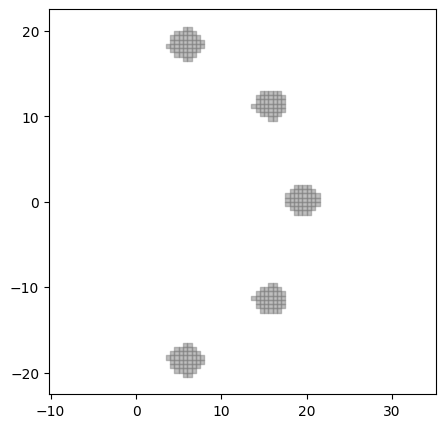

--------------------------------------------------
label: VentHole Chromosome_118: ['CircleShape_118', 'CornerTransformation_180']
predict: (0.2944261287713786, 372.71962360000015, 456.20798279999985)
biased_fitness: 0.6284564055434567, fitness: 0.661100680286214
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


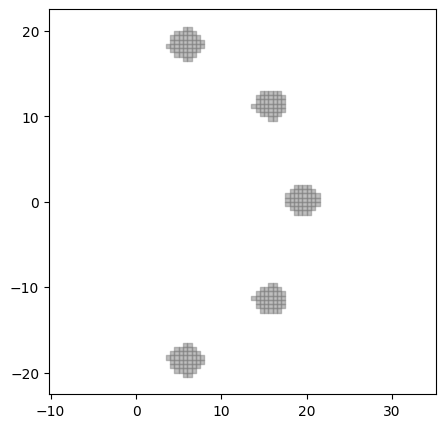

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_134', 'CornerTransformation_134']
predict: (0.293866463442649, 373.63191639999997, 458.7373597999999)
biased_fitness: 0.6204934174882124, fitness: 0.6494889845735105
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


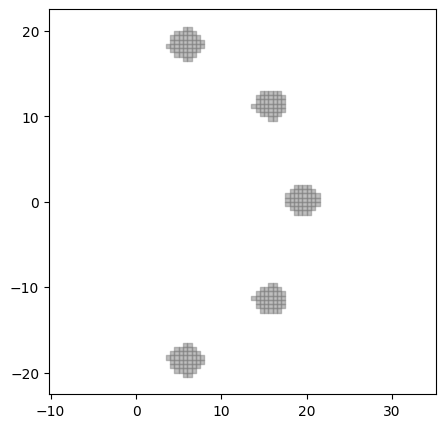

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_150', 'CornerTransformation_150']
predict: (0.2937693583512601, 373.35553840000006, 458.5491769999997)
biased_fitness: 0.6237932997848794, fitness: 0.6527828394873999
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


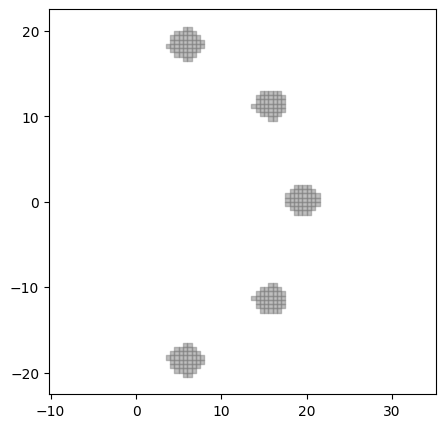

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_134', 'CornerTransformation_150']
predict: (0.2937978861162825, 373.3972766000001, 456.3814332999998)
biased_fitness: 0.6319132504046102, fitness: 0.6631275893371754
shape parameter:
parameter_list: [ r: 2.319917155796821, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


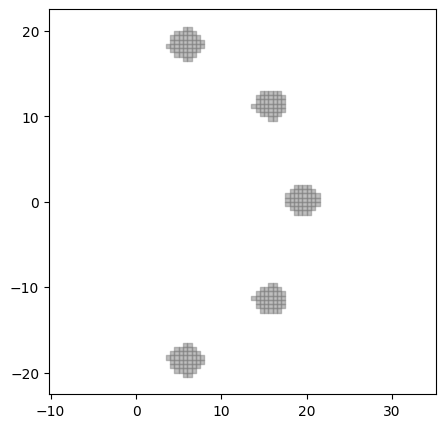

--------------------------------------------------
label: VentHole Chromosome_150: ['CircleShape_79', 'CornerTransformation_183']
predict: (0.29412143244489986, 373.3146677000001, 456.6646798999996)
biased_fitness: 0.6273107525612027, fitness: 0.6588889375510029
shape parameter:
parameter_list: [ r: 1.7899199852370584, ]
pattern parameter:
parameter_list: [ di: 14.279495641715535, dx: 3.1589950694249103, phi: 0.6388984875611192, rot_count: 3.0, ]


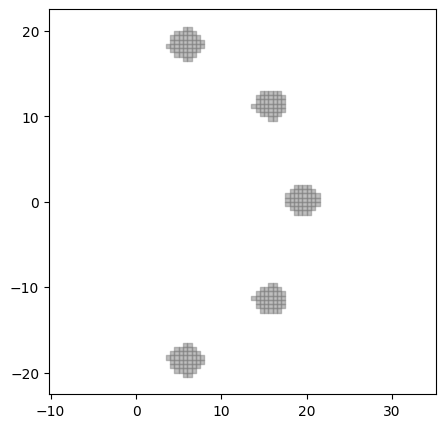

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )